# 3) Unifying & Transformation
Datentypen und Formate analysieren und bei Bedarf vereinheitlichen,
Daten sinnvoll zusammenführen

## 3.1 Importieren der Bibliotheken

In [7]:
# Importieren der notwendigen Bibliotheken
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## 3.2 Datensatz laden

In [8]:
# Funktion zum Laden der Daten
def load_data(file_path):
    try:
        data = pd.read_csv(file_path)
        print(f"Datensatz erfolgreich geladen! Form: {data.shape}")
        return data
    except FileNotFoundError:
        print("Fehler: Datei wurde nicht gefunden. Bitte prüfen Sie den Dateipfad.")
    except pd.errors.ParserError:
        print("Fehler: Problem beim Parsen der Datei. Bitte prüfen Sie das Dateiformat.")
    except Exception as e:
        print(f"Unerwarteter Fehler: {e}")
        return None

# Eingabedatei definieren
file_path = "raw/wine_quality.csv"

# Datensatz laden
data = load_data(file_path)

# Überblick anzeigen
if data is not None:
    display(data.head())

Datensatz erfolgreich geladen! Form: (6497, 13)


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## 3.3 Kodieren der type-Spalte

In [9]:
# Umwandlung der 'type'-Spalte in numerische Werte (nur einmal) und Ausgabe von Beispielen
def encode_type_and_display_samples(data):
    try:
        if 'type' in data.columns:
            # Überprüfen, ob die Spalte bereits numerisch kodiert wurde
            if data['type'].dtype in ['int64', 'float64'] and data['type'].isin([0, 1]).all():
                print("Die 'type'-Spalte ist bereits kodiert. Keine weiteren Änderungen erforderlich.")
            else:
                # Überprüfung der einzigartigen Werte vor der Kodierung
                unique_values = data['type'].unique()
                print(f"Eindeutige Werte in der 'type'-Spalte vor der Kodierung: {unique_values}")

                # Kodierung der 'type'-Spalte
                data['type'] = data['type'].map({'white': 1, 'red': 0})

                # Überprüfen, ob die Kodierung erfolgreich war
                if data['type'].isnull().sum() > 0:
                    print("Warnung: Einige Werte konnten nicht kodiert werden:")
                    display(data[data['type'].isnull()])

                print("\nKodierung der 'type'-Spalte abgeschlossen! (1: Weisswein, 0: Rotwein)")
            
            # Anzeigen von Beispielen für Weisswein (type = 1)
            white_wine_samples = data[data['type'] == 1].head()
            print("\nBeispiele für Weisswein:")
            display(white_wine_samples)

            # Anzeigen von Beispielen für Rotwein (type = 0)
            red_wine_samples = data[data['type'] == 0].head()
            print("\nBeispiele für Rotwein:")
            display(red_wine_samples)

            return data
        else:
            print("Die Spalte 'type' ist nicht im Datensatz enthalten.")
            return data
    except Exception as e:
        print(f"Fehler bei der Kodierung der 'type'-Spalte: {e}")
        return data

# Kodieren der 'type'-Spalte und Anzeige von Beispielen
if data is not None:
    data = encode_type_and_display_samples(data)

Eindeutige Werte in der 'type'-Spalte vor der Kodierung: ['white' 'red']

Kodierung der 'type'-Spalte abgeschlossen! (1: Weisswein, 0: Rotwein)

Beispiele für Weisswein:


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6



Beispiele für Rotwein:


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4898,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
4899,0,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
4900,0,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
4901,0,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4902,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## 3.4 Einteilung der Qualität in Kategorien

In [10]:
# Einteilung der Qualität in Kategorien
def categorize_quality(data):
    try:
        # Kategorien und Labels definieren
        bins = [0, 3, 5, 7, 9, 10]  # Grenzen für die Kategorien
        labels = ['Sehr schlecht', 'Schlecht', 'Okay', 'Gut', 'Sehr gut']
        
        # Neue Spalte erstellen
        data['quality_category'] = pd.cut(data['quality'], bins=bins, labels=labels, right=False)
        
        # Häufigkeiten anzeigen und sicherstellen, dass alle Kategorien berücksichtigt werden
        category_counts = data['quality_category'].value_counts().reindex(labels, fill_value=0)
        print("\nKategorie-Einteilung der Qualität abgeschlossen!")
        print(category_counts)  # Ausgabe aller Kategorien, auch mit 0 Werten
        
        return data
    except Exception as e:
        print(f"Fehler bei der Kategorisierung der Qualität: {e}")
        return data

# Kategorisieren der Qualität
if data is not None:
    data = categorize_quality(data)
    display(data[['quality', 'quality_category']].head())


Kategorie-Einteilung der Qualität abgeschlossen!
quality_category
Sehr schlecht       0
Schlecht          246
Okay             4974
Gut              1272
Sehr gut            5
Name: count, dtype: int64


,quality,quality_category
0,6,Okay
1,6,Okay
2,6,Okay
3,6,Okay
4,6,Okay


## 3.5 Speichern des transformierten Datensatzes

In [12]:
# Speichern des transformierten Datensatzes
def save_transformed_data(data, output_path):
    try:
        # Sicherstellen, dass der Index nicht mitgespeichert wird
        data.to_csv(output_path, index=False)
        print(f"\nDer transformierte Datensatz wurde erfolgreich gespeichert unter: {output_path}")
    except Exception as e:
        print(f"Fehler beim Speichern des Datensatzes: {e}")

# Ausgabedatei definieren
output_file_path = "wine_quality_processed.csv"

# Datensatz speichern
if data is not None:
    save_transformed_data(data, output_file_path)


Der transformierte Datensatz wurde erfolgreich gespeichert unter: wine_quality_processed.csv


## 3.7 Analyse tranformierter Datensatz

Datensatz erfolgreich geladen!

Erster Blick auf die Daten:


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_category
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,Okay
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,Okay
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,Okay
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,Okay
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,Okay



Zusammenfassung der Daten:


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,0.753886,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,0.430779,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,0.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,1.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,1.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,1.000000,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,1.000000,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000



Informationen zum Datensatz:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   int64  
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
 13  quality_category      6497 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory

None


Häufigkeit der Qualitätskategorien:
quality_category
Sehr Schlecht       0
Schlecht          246
Okay             4974
Gut              1272
Sehr gut            5
Name: count, dtype: int64


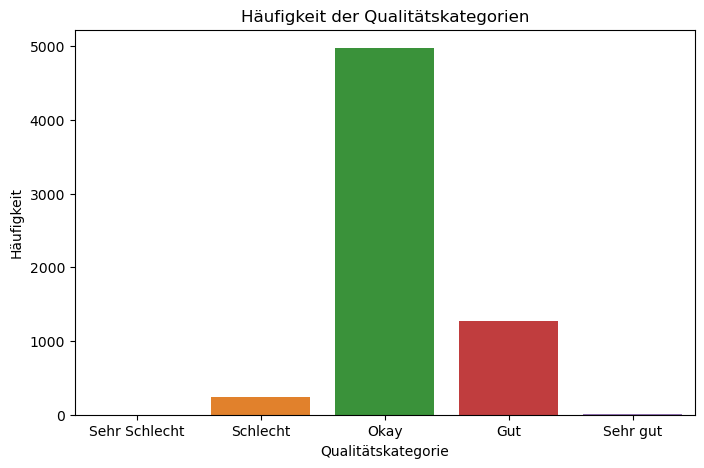


Analyse abgeschlossen!


In [20]:
# Pfad zur gespeicherten Datei
file_path = "wine_quality_processed.csv"

# Datensatz laden
try:
    data = pd.read_csv(file_path)
    print("Datensatz erfolgreich geladen!")
except FileNotFoundError:
    print("Fehler: Die Datei wurde nicht gefunden.")
    data = None

if data is not None:
    # 1. Überblick über die Daten
    print("\nErster Blick auf die Daten:")
    display(data.head())
    
    print("\nZusammenfassung der Daten:")
    display(data.describe())

    print("\nInformationen zum Datensatz:")
    display(data.info())

    # 3. Verteilung der Kategorien in der `quality_category`-Spalte
    if 'quality_category' in data.columns:
        print("\nHäufigkeit der Qualitätskategorien:")
        
        # Vordefinierte Kategorienliste
        categories = ['Sehr Schlecht', 'Schlecht', 'Okay', 'Gut', 'Sehr gut']
        
        # Häufigkeiten zählen und fehlende Kategorien auffüllen
        category_counts = data['quality_category'].value_counts()
        category_counts = category_counts.reindex(categories, fill_value=0)
        
        print(category_counts)

        # Balkendiagramm erstellen
        plt.figure(figsize=(8, 5))
        sns.countplot(
            x=data['quality_category'],
            order=categories
        )
        plt.title("Häufigkeit der Qualitätskategorien")
        plt.xlabel("Qualitätskategorie")
        plt.ylabel("Häufigkeit")
        plt.show()

    # Analyse abschließen
    print("\nAnalyse abgeschlossen!")
else:
    print("Analyse nicht möglich, da der Datensatz nicht geladen werden konnte.")


## 3.6 Fazit Unifying & Transformation

### 1) Überblick über den Datensatz:
Der Datensatz enthält 6497 Beobachtungen und 14 Merkmale.
Die Merkmale umfassen chemische Eigenschaften wie Säurewerte, Zucker- und Schwefelgehalt, sowie die Kategorie der Weinqualität.

### 2) Qualitätsverteilung:
Die Mehrheit der Weine wurde als "Okay" (4974) klassifiziert.
Nur wenige Weine wurden als "Sehr gut" (5) oder "Schlecht" (246) eingestuft.
Die Kategorie "Sehr Schlecht" ist vorhanden, aber es wurden keine Weine in diese Kategorie eingeordnet.
### 3) Fehlerfreiheit:
Es gibt keine fehlenden Werte in den Daten, was eine solide Grundlage für weitere Analysen darstellt.

### 4) Next Step:
- Data Cleansing: Beurteilung der Datenqualität und erforderliche Bereinigung der Daten
- Analysis & Validation: Analyse der Verteilungen, Abweichungen & Kennzahlen